In [2]:
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

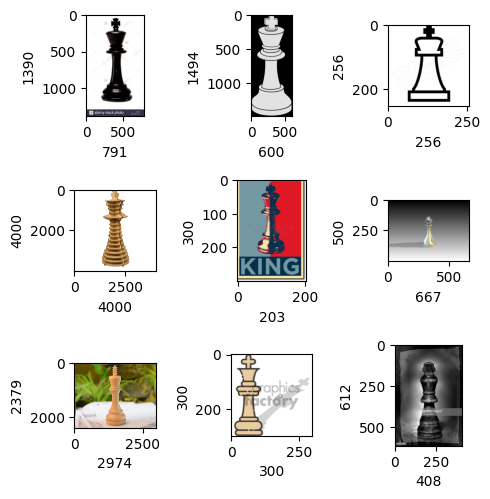

In [14]:
import random
import os
image_directory = "/content/drive/MyDrive/Colab Notebooks/AI/Chessman/archive/Chessman-image-dataset/Chess/King"
plt.figure(figsize=(5,5))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.tight_layout()
  rand_img = imread(image_directory+"/"+ random.choice(sorted(os.listdir(image_directory))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [15]:
img_height,img_width,batch_size,epochs = 537,618,64,10

In [16]:
import keras
train_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/AI/Chessman/archive/Chessman-image-dataset/Chess",
    validation_split = 0.2,
    subset='training',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [17]:
val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/AI/Chessman/archive/Chessman-image-dataset/Chess",
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 6 classes.
Using 165 files for validation.


In [18]:
normalization_layer = keras.layers.Rescaling(1./255)

In [19]:
normalized_ds  = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [21]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [22]:
num_of_classes = len(train_ds.class_names)
num_of_classes

6

In [25]:
model = Sequential([
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(16,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes)
])

In [27]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
7/7 [==============================] - 183s 25s/step - loss: 35.0653 - accuracy: 0.1606 - val_loss: 13.0098 - val_accuracy: 0.1636
Epoch 2/10
7/7 [==============================] - 166s 23s/step - loss: 8.1185 - accuracy: 0.2240 - val_loss: 2.9326 - val_accuracy: 0.1939
Epoch 3/10
7/7 [==============================] - 163s 23s/step - loss: 2.1026 - accuracy: 0.2443 - val_loss: 1.7784 - val_accuracy: 0.2424
Epoch 4/10
7/7 [==============================] - 171s 24s/step - loss: 1.5195 - accuracy: 0.4842 - val_loss: 1.6854 - val_accuracy: 0.3394
Epoch 5/10
7/7 [==============================] - 165s 23s/step - loss: 1.2562 - accuracy: 0.5588 - val_loss: 1.6655 - val_accuracy: 0.3697
Epoch 6/10
7/7 [==============================] - 167s 23s/step - loss: 0.9654 - accuracy: 0.6878 - val_loss: 1.6172 - val_accuracy: 0.4485
Epoch 7/10
7/7 [==============================] - 166s 23s/step - loss: 0.6677 - accuracy: 0.8190 - val_loss: 1.5518 - val_accuracy: 0.4848
Epoch 8/10
7/7 [==

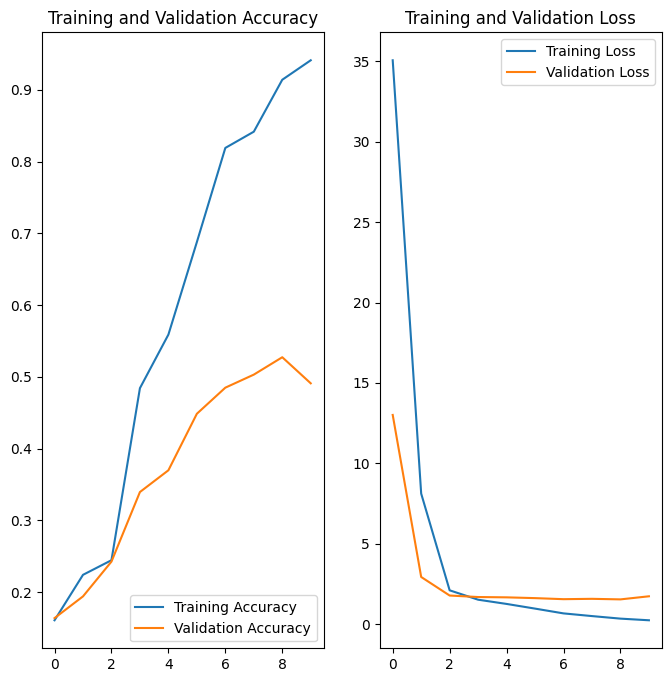

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()